This script is based on Yuvraj Chopra, Y. (2020). Image Segmentation using Sklearn and K-Means <br>
To obtain the colors<br>
You can use it 

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np 

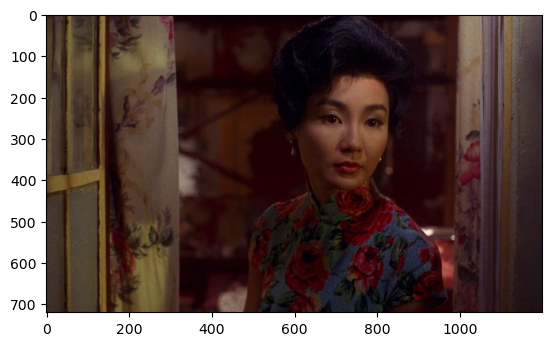

In [3]:
A=cv.imread("maggieC2.jpg")
A=cv.cvtColor(A,cv.COLOR_BGR2RGB)
plt.imshow(A)

In [5]:
B=A.reshape((-1,3))
B=np.float32(B)

In [7]:
criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100,0.9)
k=8 #Clusters
comp, labels, centers = cv.kmeans(B, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [9]:
centers = np.uint8(centers)
result = centers[labels.flatten()]
print(result)

[[35 25 29]
 [35 25 29]
 [35 25 29]
 ...
 [36  6  7]
 [36  6  7]
 [36  6  7]]


(-0.5, 1199.5, 719.5, -0.5)

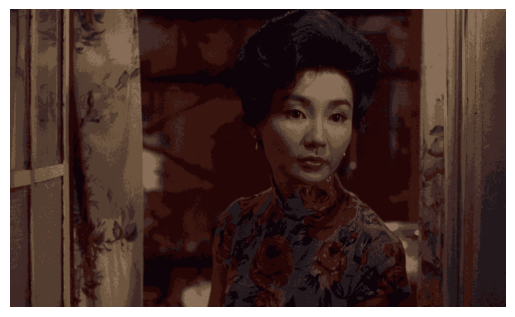

In [11]:
result = result.reshape((A.shape))
plt.imshow(result)
plt.axis("off")

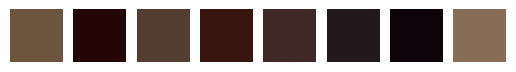

In [13]:
colors=[]
j=0
pC=[]

while j<k:
    plt.subplot(1,k,j+1)
    plt.axis("off")
    
    colors.append(centers[j])
    a = np.zeros((50,50,3),dtype='uint8')
    # Color Swatch
    a[:,:,:] = colors[j]
    pC.append(a)
    plt.imshow(a)
    j=j+1

<function matplotlib.pyplot.show(close=None, block=None)>

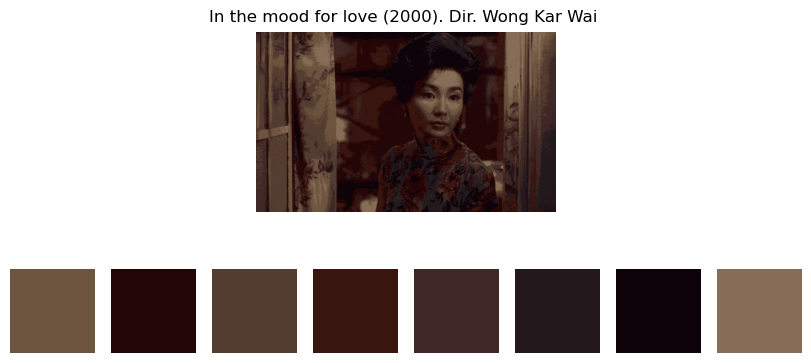

In [15]:
fig = plt.figure(layout="constrained",figsize=(8, 4))
gs = GridSpec(2, k, figure=fig)
ax0 = fig.add_subplot(gs[0,:])
#fig.subplots_adjust(hspace=0,bottom=0,left=0)
ax0.imshow(result)
ax0.axis("off")
n=0
while n<k:
    ax1 = fig.add_subplot(gs[-1:,n]) 
    ax1.imshow(pC[n])
    ax1.axis("off")
    #fig.subplots_adjust(hspace=0,bottom=0.2,left=0,wspace=0.1)
    n=n+1
plt.suptitle(t="In the mood for love (2000). Dir. Wong Kar Wai ")
plt.show
#plt.savefig("mad.jpg",dpi=500)

In [17]:
colors

[array([108,  84,  62], dtype=uint8),
 array([36,  6,  7], dtype=uint8),
 array([83, 60, 48], dtype=uint8),
 array([56, 21, 15], dtype=uint8),
 array([63, 40, 37], dtype=uint8),
 array([35, 25, 29], dtype=uint8),
 array([13,  3,  8], dtype=uint8),
 array([135, 109,  88], dtype=uint8)]